In [2]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

In [190]:
df = pd.read_csv('cubic_zirconia.csv')

In [191]:
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [5]:
df.dtypes 

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [6]:
df.shape

(26967, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


Observation-1:
.The data set contains 26967 row, 11 columns .
.In the given data set there are 2 Integer type features,6 Float type features. 3 Object type features. Where 'price' is the target variable and all other are predector variable.
The first column is an index ("Unnamed: 0")as this only serial no, we can remove it.
Exept depth, in all the column non null count is 26967.

In [8]:
lr_df = df.drop('Unnamed: 0', axis=1)

In [9]:
lr_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [194]:
lr_df.describe(include="all")

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.793298,2.909702,3.394794,3.053577,61.746701,57.435544,5.729323,5.731255,3.536928,3735.832213
std,0.462127,1.113165,1.705883,1.646749,1.393875,2.157119,1.126175,1.118155,0.696753,3468.207359
min,0.200000,0.000000,0.000000,0.000000,50.800000,51.500000,1.950000,1.965000,1.190000,326.000000
25%,0.400000,2.000000,2.000000,2.000000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,4.000000,5.000000,4.000000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,2.025000,4.000000,6.000000,7.000000,73.600000,63.500000,9.310000,9.285000,5.750000,11972.500000


In [11]:
lr_df.describe(include=['object'])

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


In [12]:
print("Number of rows with x == 0: {} ".format((lr_df.x==0).sum()))
print("Number of rows with y == 0: {} ".format((lr_df.y==0).sum()))
print("Number of rows with z == 0: {} ".format((lr_df.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((lr_df.depth==0).sum()))

Number of rows with x == 0: 3 
Number of rows with y == 0: 3 
Number of rows with z == 0: 9 
Number of rows with depth == 0: 0 


In [13]:
lr_df.shape

(26967, 10)

Observation-2: 
On the given data set the the mean and median values does not have much differenc. .We can observe Min value of "x", "y", & "z" are zero this indicates that they are faulty values. As we know dimensionless or 2-dimensional diamonds are not possible. So we need to filter out those as it clearly faulty data entries. .There are three object data type 'cut', 'color' and 'clarity'.

EDA-Step-1: Checking for duplicate records in the data.¶

In [16]:
dups = lr_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(lr_df.shape)

Number of duplicate rows = 34
(26967, 10)


In [17]:
print('Before',lr_df.shape)
lr_df.drop_duplicates(inplace=True) 
print('After',lr_df.shape)

Before (26967, 10)
After (26933, 10)


In [18]:
dups = lr_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


EDA-Step 2: Checking Missing value.

In [19]:
lr_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

Observation-3:
we can observe there are 697 missing value in the depth column. Missing value treatment will be done in section 1.2.

EDA-Step 3 : Outlier Checks.

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


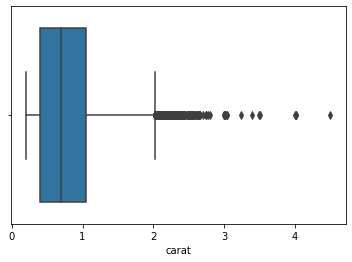

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


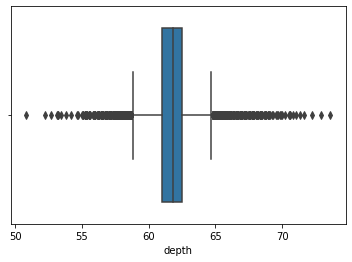

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


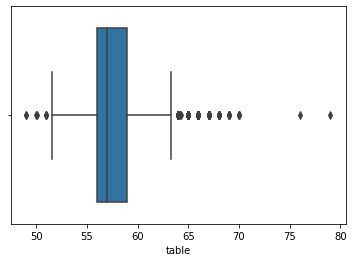

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


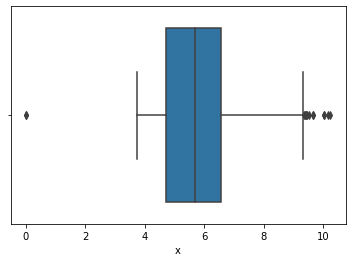

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


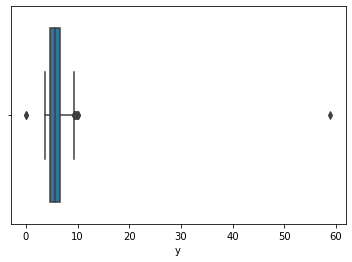

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


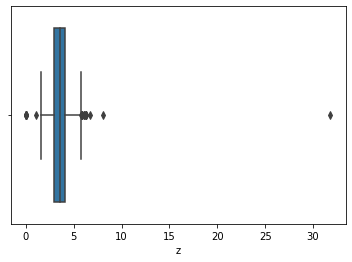

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


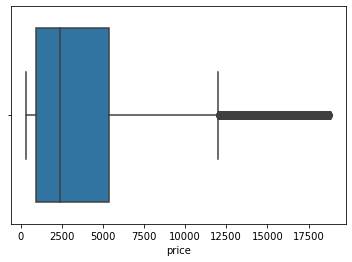

In [20]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(lr_df[i],whis=1.5)
    plt.show();

In [21]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [22]:
for column in lr_df[cols].columns:
    lr,ur=remove_outlier(lr_df[column])
    lr_df[column]=np.where(lr_df[column]>ur,ur,lr_df[column])
    lr_df[column]=np.where(lr_df[column]<lr,lr,lr_df[column])

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


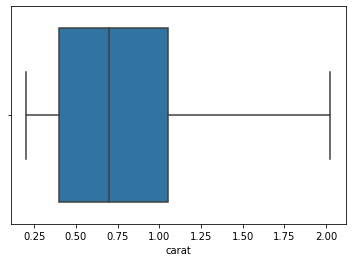

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


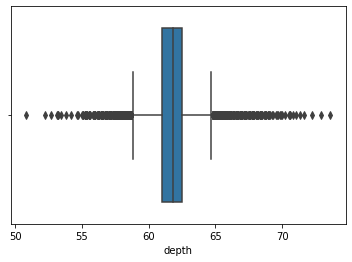

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


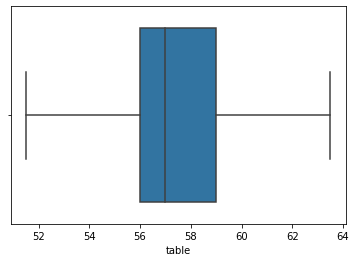

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


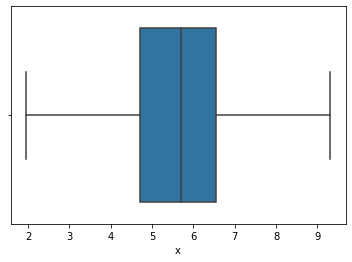

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


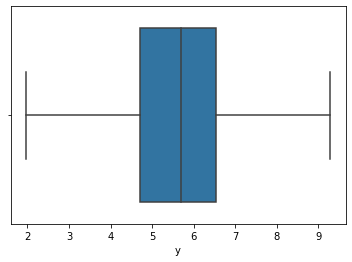

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


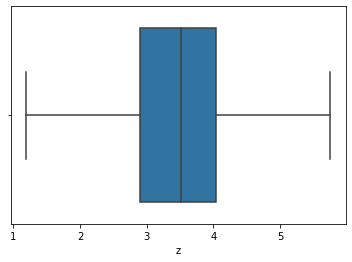

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


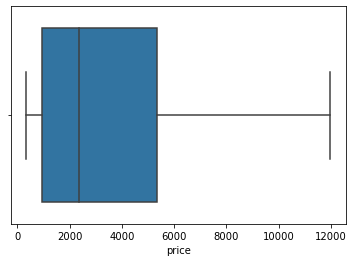

In [23]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(lr_df[i],whis=1.5)
    plt.show();

EDA-Step 4 : Univariate Analysis.

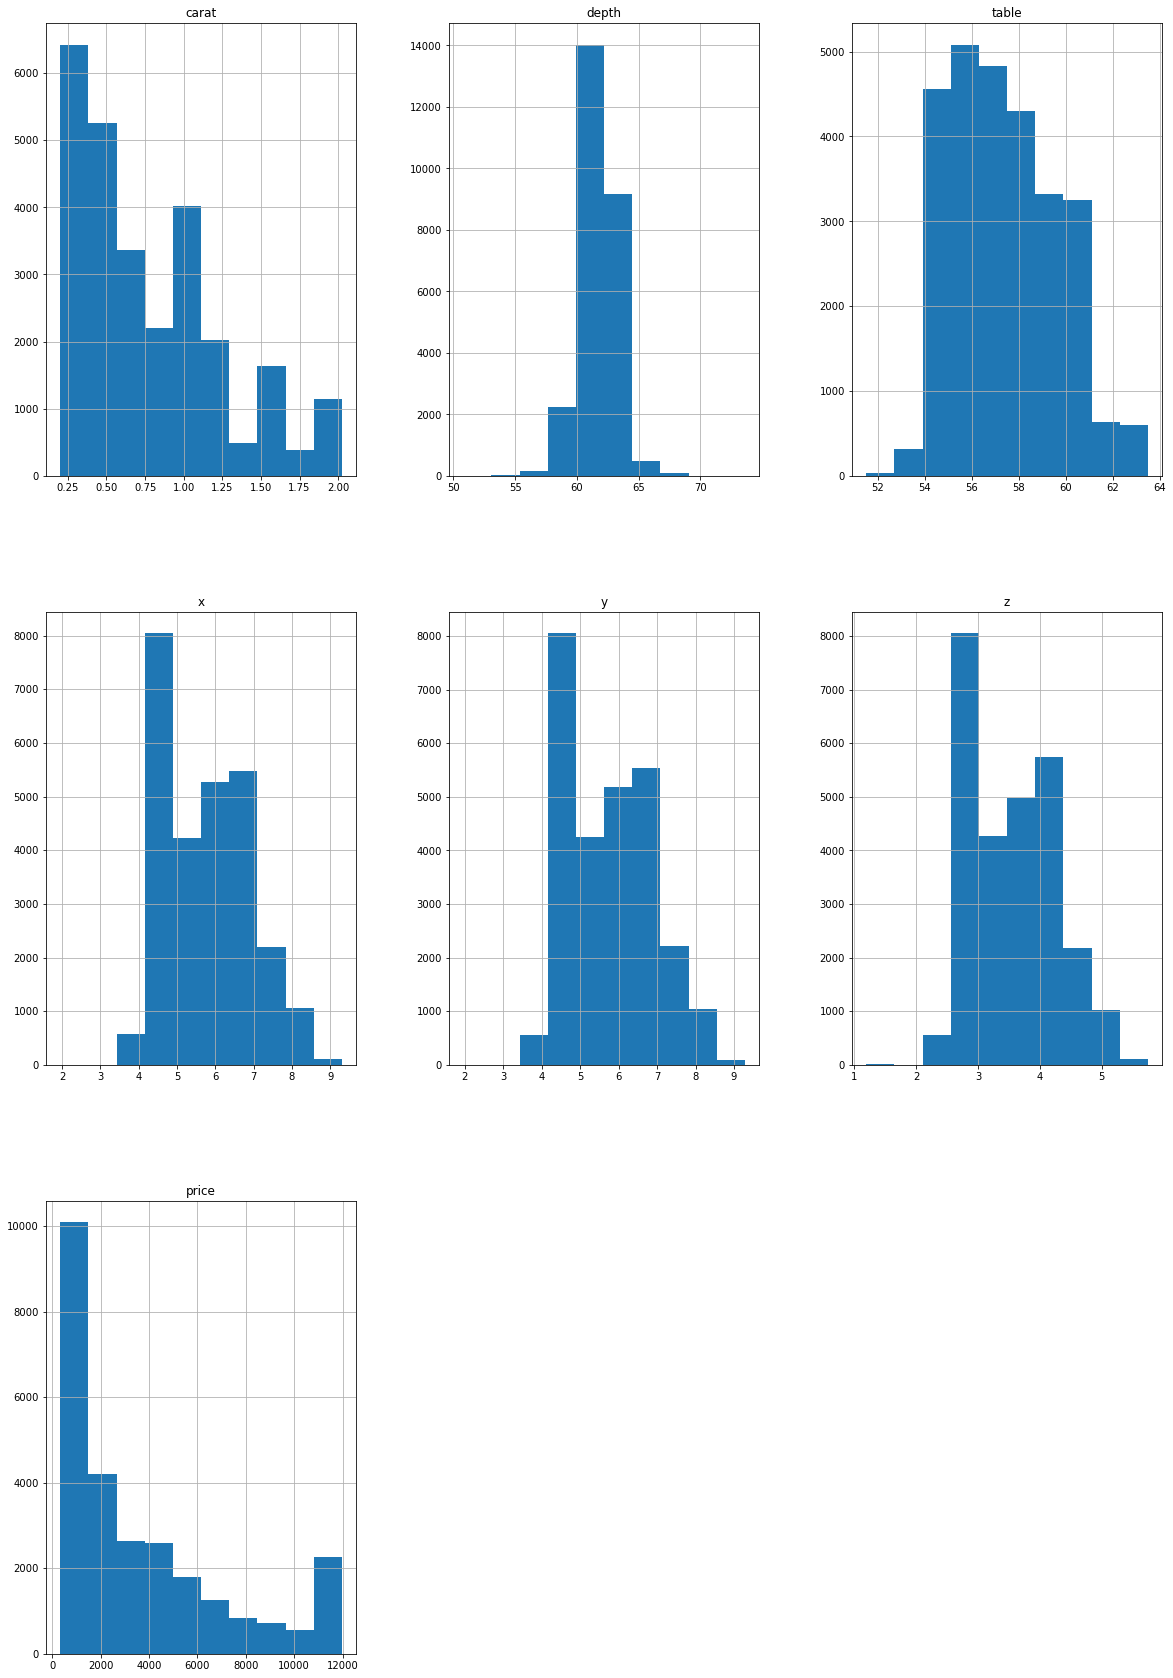

In [24]:
lr_df.hist(figsize=(20,30));

In [25]:
lr_df.skew()

carat    0.917162
depth   -0.026086
table    0.480121
x        0.395196
y        0.391510
z        0.384522
price    1.157688
dtype: float64

Observation-4: :
(1).There is significant amount of outlier present in some variable. (2) We can see that the distribution of some quantitative features like "carat" and the target feature "price" are heavily "right-skewed".

EDA-Step 5 : Bivariate Analysis.

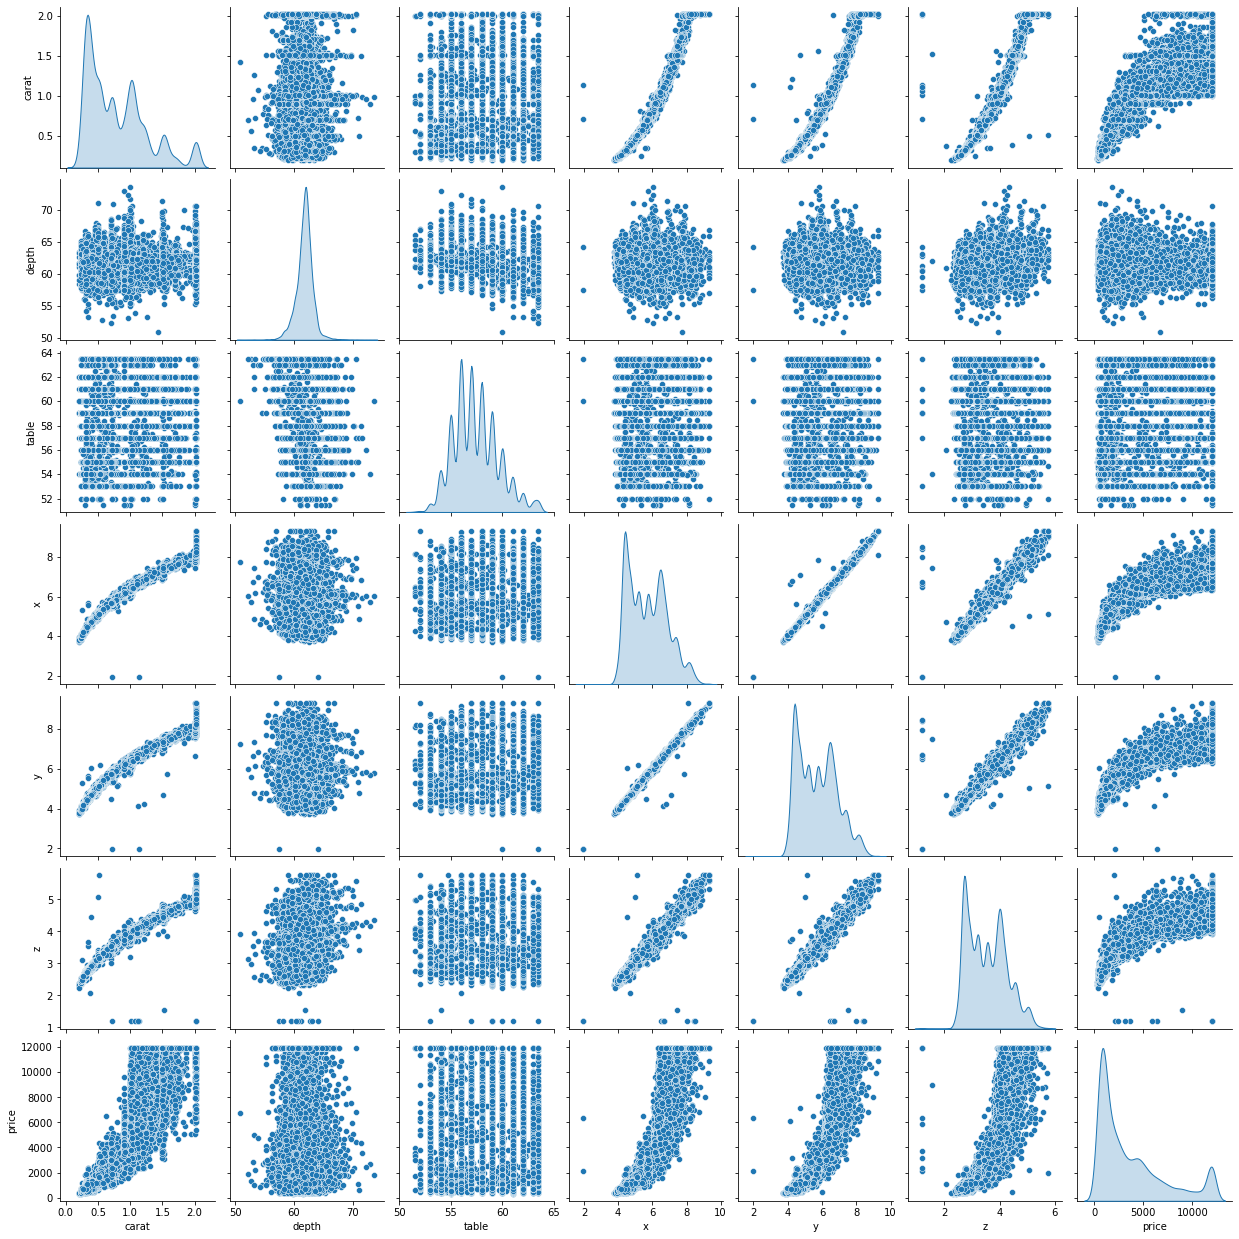

In [26]:
import seaborn as sns

df_attr = ( lr_df[cols])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

Get the Correlation Heatmap

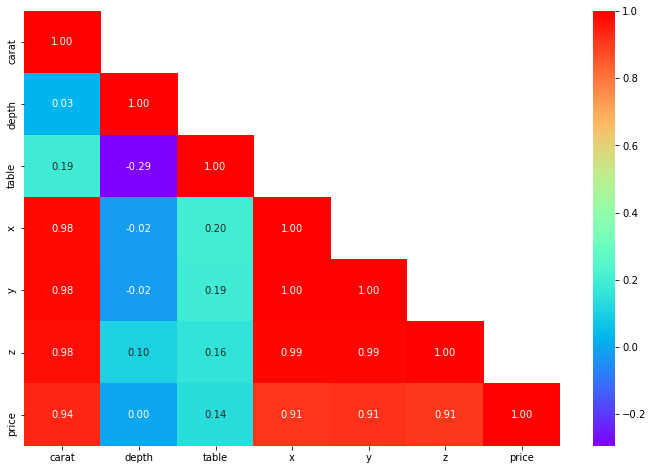

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(lr_df.corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(lr_df.corr(),+1))
plt.show()

How each feature affects the price of diamonds.

In [28]:
correlations = lr_df.corr()
correlations["price"].sort_values(ascending=False)

price    1.000000
carat    0.936762
y        0.914361
x        0.912933
z        0.905866
table    0.137880
depth    0.000094
Name: price, dtype: float64

Observation-5:
It can be inferred that most features correlate with the price of Diamond. The notable exception is "depth" which has a negligible correlation (<1%).

EDA for Categorical variable.

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


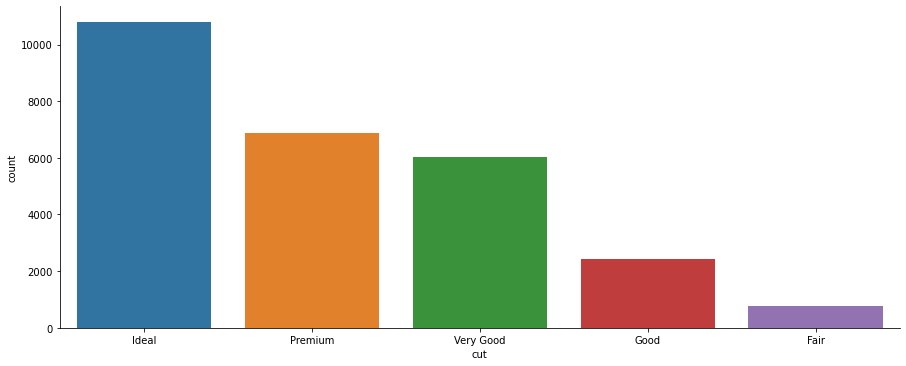

In [29]:
sns.catplot('cut', data=lr_df, kind='count',aspect=2.5)

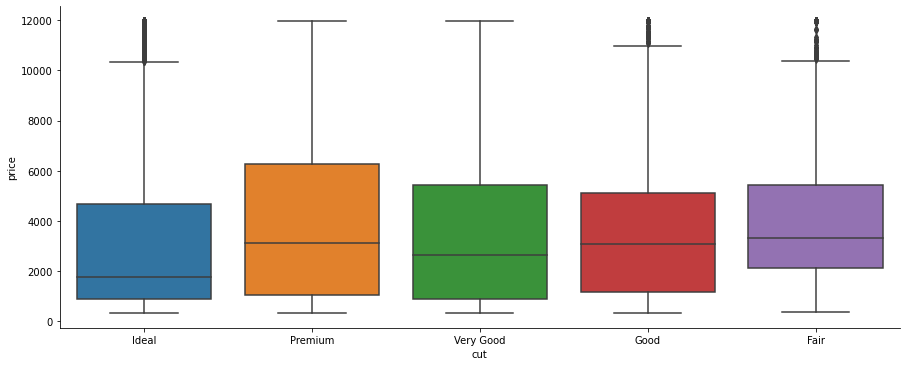

In [30]:
sns.catplot(x='cut', y='price', kind='box', data=lr_df, aspect=2.5)

observation on 'CUT': The Premium Cut on Diamonds are the most Expensive, followed by Very Good Cut.

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


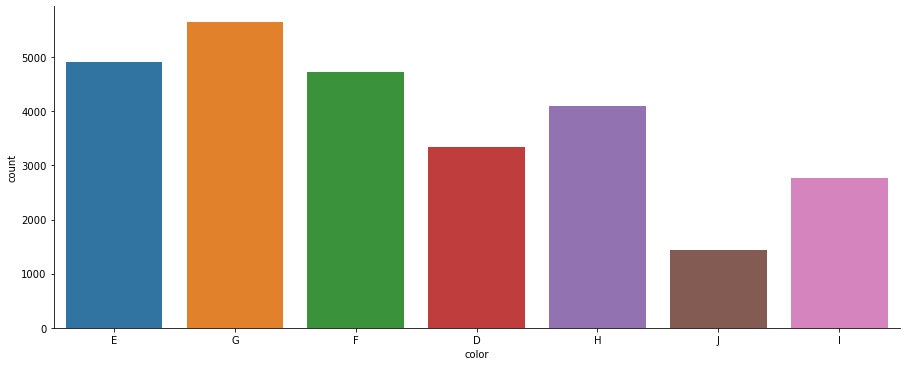

In [31]:
sns.catplot('color', kind='count', data=lr_df, aspect=2.5)

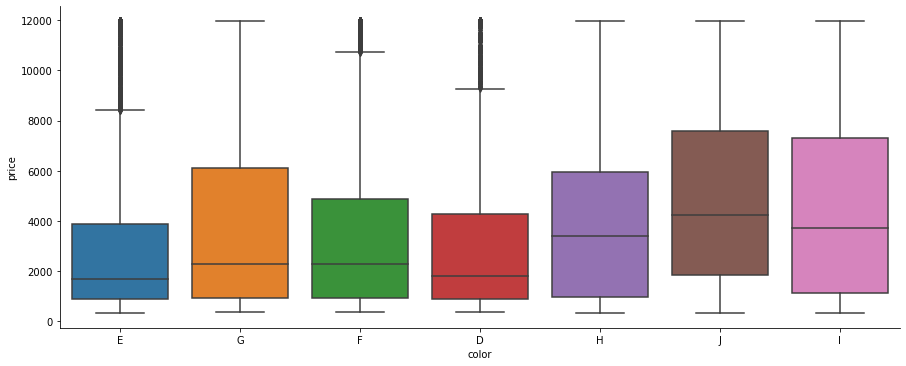

In [32]:
sns.catplot(x='color', y='price', data=lr_df, aspect =2.5, kind='box')

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


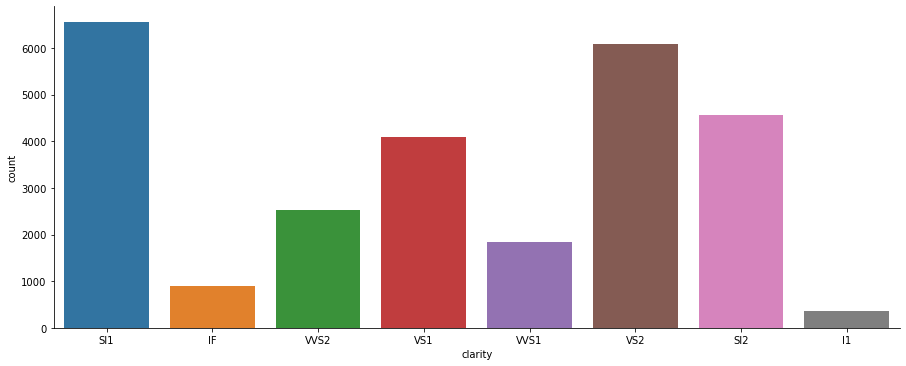

In [33]:
sns.catplot('clarity', data=lr_df, kind='count',aspect=2.5)

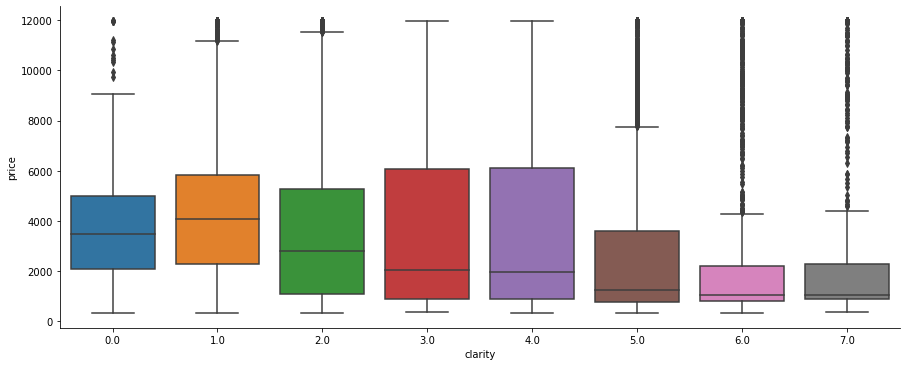

In [196]:
sns.catplot(x='clarity', y='price', data=lr_df, aspect =2.5, kind='box')

The inferences drawn from the above Exploratory Data analysis:

Observation-1:
(1).'Price' is the target variable while all others are the predictors. (2).The data set contains 26967 row, 11 column. (3).In the given data set there are 2 Integer type features,6 Float type features. 3 Object type features. Where 'price' is the target variable and all other are predector variable. (4)The first column is an index ("Unnamed: 0")as this only serial no, we can remove it.

Observation-2: (1).On the given data set the the mean and median values does not have much differenc. (2).We can observe Min value of "x", "y", "z" are zero this indicates that they are faulty values. As we know dimensionless or 2-dimensional diamonds are not possible. So we have filter out those as it clearly faulty data entries. (3).There are three object data type 'cut', 'color' and 'clarity'.

Observation-3: we can observe there are 697 missing value in the depth column. There are some duplicate row present. (33 duplicate rows out of 26958). which is nearly 0.12 % of the total data. So on this case we have dropped the duplicated row.

Observation-4: :
There are significant amount of outlier present in some variable,the features with datapoint that are far from the rest of dataset which will affect the outcome of our regression model. So we have treat the outliar. We can see that the distribution of some quantitative features like "carat" and the target feature "price" are heavily "right-skewed".

Observation-5:
It looks like most features do correlate with the price of Diamond. The notable exception is "depth" which has a negligble correlation (~1%). Observation on 'CUT': The Premium Cut on Diamonds are the most Expensive, followed by Very Good Cut.

# 1.2

In [35]:
lr_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [36]:
lr_df.median()

carat       0.70
depth      61.80
table      57.00
x           5.69
y           5.70
z           3.52
price    2375.00
dtype: float64

In [37]:
lr_df = lr_df.fillna(lr_df.median())

In [38]:
lr_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

Checking for the values which are equal to zero.
In Qs.1.1 we have alrady check for 'Zero' value. and we can observe there are some amount of 'Zero' value present on the data set on variable 'x', 'y','z'.

This indicates that they are faulty values.

In [39]:
lr_df.shape

(26933, 10)

But is scaling necessary in this case?
No, it is not necessary, we'll get an equivalent solution whether we apply some kind of linear scaling or not. But recommended for regression techniques as well because it would help gradient descent to converge fast and reach the global minima. When number of features becomes large, it helps is running model quickly else the starting point would be very far from minima, if the scaling is not done in preprocessing.

For now we will process the model without scaling and later we will check the output with scaled data of regression model output

Geting unique counts of all Objects

In [40]:
print('cut\n',lr_df.cut.value_counts())
print('\n')
print('color\n',lr_df.color.value_counts())
print('\n')
print('clarity\n',lr_df.clarity.value_counts())
print('\n')

cut
 Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64


color
 G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64


clarity
 SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64




Converting objects to categorical codes.

In [41]:
lr_df['cut']=np.where(lr_df['cut'] =='Ideal', '4', lr_df['cut'])
lr_df['cut']=np.where(lr_df['cut'] =='Premium', '3', lr_df['cut'])
lr_df['cut']=np.where(lr_df['cut'] =='Very Good', '2', lr_df['cut'])
lr_df['cut']=np.where(lr_df['cut'] =='Good', '1', lr_df['cut'])
lr_df['cut']=np.where(lr_df['cut'] =='Fair', '0', lr_df['cut'])

In [42]:
lr_df['color']=np.where(lr_df['color'] =='D', '6', lr_df['color'])
lr_df['color']=np.where(lr_df['color'] =='E', '5', lr_df['color'])
lr_df['color']=np.where(lr_df['color'] =='F', '4', lr_df['color'])
lr_df['color']=np.where(lr_df['color'] =='G', '3', lr_df['color'])
lr_df['color']=np.where(lr_df['color'] =='H', '2', lr_df['color'])
lr_df['color']=np.where(lr_df['color'] =='I', '1', lr_df['color'])
lr_df['color']=np.where(lr_df['color'] =='J', '0', lr_df['color'])

In [43]:
lr_df['clarity']=np.where(lr_df['clarity'] =='IF', '7', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='VVS1', '6', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='VVS2', '5', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='VS1', '4', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='VS2', '3', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='SI1', '2', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='SI2', '1', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='I1', '0', lr_df['clarity'])

In [44]:
lr_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [45]:
lr_df['cut'] = lr_df['cut'].astype('float64')
lr_df['color'] = lr_df['color'].astype('float64')
lr_df['clarity'] = lr_df['clarity'].astype('float64')

In [46]:
lr_df.dtypes

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [47]:
lr_df.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65,779.0
5,1.02,4.0,6.0,3.0,61.5,56.0,6.46,6.49,3.99,9502.0
6,1.01,1.0,2.0,2.0,63.7,60.0,6.35,6.30,4.03,4836.0
7,0.50,3.0,5.0,2.0,61.5,62.0,5.09,5.06,3.12,1415.0
8,1.21,1.0,2.0,2.0,63.8,63.5,6.72,6.63,4.26,5407.0
9,0.35,4.0,4.0,3.0,60.5,57.0,4.52,4.60,2.76,706.0


# Train-Test Split:

In [48]:
X = lr_df.drop('price', axis=1)

In [49]:
y = lr_df[['price']]
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [52]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [53]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 8865.066300084878
The coefficient for cut is 106.64205705901601
The coefficient for color is 277.73325234663474
The coefficient for clarity is 439.8925572913192
The coefficient for depth is -26.17684710013513
The coefficient for table is -15.096171876469446
The coefficient for x is -1449.0419227177363
The coefficient for y is 1161.747577450895
The coefficient for z is -137.49839489036776


In [55]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1275.7248878055789


Observation-2: The intercept (often labelled the constant) is the expected mean value of Y when all X=0. If X never equals 0, then the intercept has no intrinsic meaning.

The intercept for our model is -3171.950447307667. In preset case when the other predictor variable are zero i.e like carat,cut, color, clarity all are zero then the C=-3172. ( Y = m1X1 + m2X2+ ….. + mnXn + C + e) that means price is -3172. which is meaningless. We can do Z score or scaling the data and make it nearly zero.

In [56]:
regression_model.score(X_train, y_train)

0.9312009582430333

In [57]:
regression_model.score(X_test, y_test)

0.9312386078792532

Observation-3:
R-square is the percentage of the response variable variation that is explained by a linear model. Or:

R-square = Explained variation / Total variation

R-squared is always between 0 and 100%: 0% indicates that the model explains none of the variability of the response data around its mean.100% indicates that the model explains all the variability of the response data around its mean. In this regression model we can see the R-square value on Training and Test data respectively 0.9312009582430333 and 0.9312386078792532

In [58]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

909.021075592446

In [59]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

910.9629751292744

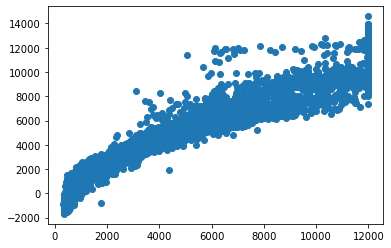

In [60]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
y_pred = regression_model.predict(X_test)
plt.scatter(y_test['price'], y_pred)

Observation-4:
we can see that the is a linear plot, very strong corelation between the predicted y and actual y. But there are lots of spread. That indicated some kind noise present on the data set i.e Unexplained variances on the output.

Linear regression Performance Metrics:

intercept for the model: -1275.7248878055789
R square on training data:  0.9312009582430333
R square on testing data: 0.9312386078792532
RMSE on Training data: 909.021075592446
RMSE on Testing data: 910.9629751292744
As the training data & testing data score are almost inline, we can conclude this model is a Right-Fit Model.

# Applying zscore statsmodels

In [62]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [63]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [64]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.1769795660392088
The coefficient for cut is 0.034042631763858695
The coefficient for color is 0.13653406101326862
The coefficient for clarity is 0.20921240351026865
The coefficient for depth is -0.010439699701202804
The coefficient for table is -0.0093810594015167
The coefficient for x is -0.46918545704424747
The coefficient for y is 0.37355839451797446
The coefficient for z is -0.027546191869735497


In [65]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.5793957305153216e-16


In [66]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test_scaled, y_test_scaled)

0.9312285167884737

Observation-5:
Now we can observe by applying z score the intercept became -5.87961525130473e-16. Earlier it was -3171.950447307667. the co-efficient has changed, the bias became nearly zero but the overall accuracy still same.

# Check Multi-collinearity using VIF

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 111.61631994738784
cut ---> 9.735524592256196
color ---> 5.543697515266383
clarity ---> 5.416389400193128
depth ---> 915.72371188346
table ---> 740.2045904166137
x ---> 10300.706237496897
y ---> 9346.70495673147
z ---> 2113.656393744822


# We can observe there are very strong multi collinearity present in the data set. Ideally it should be within 1 to 5.

We are exploring the Linear Regression using statsmodels as we are interested in some more statistical metrics of the model.

Linear Regression using statsmodels

In [69]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
22114,0.34,2.0,2.0,3.0,62.4,60.0,4.41,4.44,2.76,537.0
2275,0.30,4.0,5.0,3.0,61.2,55.0,4.35,4.31,2.65,844.0
19183,0.50,4.0,3.0,2.0,62.5,57.0,5.09,5.05,3.17,1240.0
5030,1.10,1.0,5.0,1.0,63.3,56.0,6.53,6.58,4.15,4065.0
25414,1.02,3.0,4.0,1.0,61.1,62.0,6.54,6.49,3.98,4057.0


In [70]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept   -1275.724888
carat        8865.066300
cut           106.642057
color         277.733252
clarity       439.892557
depth         -26.176847
table         -15.096172
x           -1449.041923
y            1161.747577
z            -137.498395
dtype: float64

In [71]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.834e+04
Date:                Sun, 27 Mar 2022   Prob (F-statistic):               0.00
Time:                        00:19:41   Log-Likelihood:            -1.5518e+05
No. Observations:               18853   AIC:                         3.104e+05
Df Residuals:                   18843   BIC:                         3.105e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1275.7249    660.959     -1.930      0.0

Observation-6:
Assuming null hypothesis is true, i.e there is no relationship between this variable with price. from that universe we have drawn the sample and on this sample we have found this co-efficient for the variable shown above.

Now we can ask what is the probability of finding this co-efficient in this drawn sample if in the real world the co-efficient is zero. As we see here the overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not '0'. Here all regression co-efficients are not '0'.

For an example: we can see the p value is showing 0.449 for 'depth' variable, which is much higher than 0.05. That means this dimension is useless. So we can say that the attribute which are having p value greater than 0.05 are poor predictor for price.

In [72]:
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [73]:
mse1 = np.mean((lm1.predict(data_test.drop('price',axis=1))-data_test['price'])**2)

In [74]:
np.sqrt(mse)

909.021075592446

In [75]:
np.sqrt(mse1)

910.9629751292707

In [76]:
y_pred = lm1.predict(data_test)

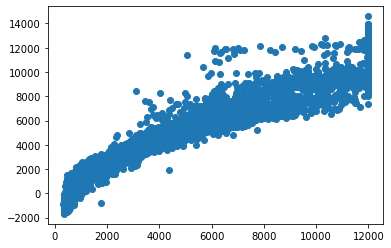

In [77]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [78]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-1275.72) * Intercept + (8865.07) * carat + (106.64) * cut + (277.73) * color + (439.89) * clarity + (-26.18) * depth + (-15.1) * table + (-1449.04) * x + (1161.75) * y + (-137.5) * z + 

Observation-7:
On the given data set we can see the 'X' i.e Length of the cubic zirconia in mm. having negative co-efficient. And the p value is less than 0.05, so can conclude that as higher the length of the stone is a lower profitable stones.

Similarly for the 'z' variable having negative co-efficient i.e -137.49 And the p value is less than 0.05, so we can conclude that as higher the 'z' of the stone is a lower profitable stones.

Also we can see the 'y' width in mm having positive co-efficient. And the p value is less than 0.05, so we can conclude that higher the width of the stone is a higher profitable stones.

Finally we can conclude that best 5 attributes that are most important are 'Carat', 'Cut', 'color','clarity' and width i.e 'y' for predicting the price.

# 1.4

Inference:
we can see that the from the linear plot, very strong corelation between the predicted y and actual y. But there are lots of spread. That indicates some kind noise present on the data set i.e Unexplained variances on the output.

Linear regression Performance Metrics:

intercept for the model: -1275.7248878055789
R square on training data:  0.9312009582430333
R square on testing data: 0.9312386078792532
RMSE on Training data: 909.021075592446
RMSE on Testing data: 910.9629751292744
As the training data & testing data score are almost inline, we can conclude this model is a Right-Fit Model.

Impact of scaling:

Now we can observe by applying z score the intercept became -1.5793957305153216e-16. Earlier it was -1275.7248878055789. the co-efficient has changed, the bias became nearly zero but the overall accuracy still same.


Multi collinearity:
We can observe there are very strong multi collinearity present in the data set.


From statsmodels:
we can see R-squared:0.931 and Adj. R-squared: 0.931 are same. The overall P value is less than alpha.

Recommendations:

The Gem Stones company should consider the features'Carat', 'Cut', 'color','clarity' and width i.e 'y' as most important for predicting the price.
To distinguish between higher profitable stones and lower profitable stones so as to have better profit share.

As we can see from the model Higher the width('y') of the stone is higher the price.

So the stones having higher width('y') should consider in higher profitable stones.
The 'Premium Cut' on Diamonds are the most Expensive, followed by 'Very Good' Cut, these should consider in higher profitable stones.

The Diamonds clarity with 'VS1' &'VS2' are the most Expensive.So these two category also consider in higher profitable stones.

As we see for 'X' i.e Length of the stone, higher the length of the stone is lower the price.

So higher the Length('x') of the stone are lower is the profitability.
higher the 'z' i.e Height of the stone is, lower the price.This is because if a Diamond's Height is too large Diamond will become 'Dark' in appearance because it will no longer return an Attractive amount of light. That is why

Stones with higher 'z' is also are lower in profitability.

# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
holi_df = pd.read_csv("Holiday_Package.csv")
holi_df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [81]:
holi_df = holi_df.drop("Unnamed: 0",axis = 1)
holi_df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [82]:
holi_df.shape

(872, 7)

In [83]:
holi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [84]:
holi_df.describe(include = "all")

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,2,NaN,NaN,NaN,NaN,NaN,2
top,no,NaN,NaN,NaN,NaN,NaN,no
freq,471,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


In [87]:
dups = holi_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [86]:
holi_df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

Summary of the Dataset

• Holiday Package – This variable is a categorical Variable. output with the This will be 
our Target Variable.

• Salary, age, educ, no_young_children, no_older_children, variables are numerical or 
continuous variables.

• Salary ranges from 1322 to 236961. Average salary of employees is around 47729 
with a standard deviation of 23418. Standard deviation indicates that the data is not 
normally distributed. skew of 0.71 indicates that the data is right skewed and there 
are few employees earning more than an average of 47729. 75% of the employees 
are earning below 53469 while 255 of the employees are earning 35324.

• Age of the employee ranges from 20 to 62. Median is around 39. 25% of the 
employees are below 32 and 25% of the employees are above 48. Standard 
deviation is around 10. Standard deviation indicates almost normal distribution.

• Years of formal education ranges from 1 to 21 years. 25% of the population has 
formal education for 8 years, while the median is around 9 years. 75% of the 
employees have formal education of 12 years. Standard deviation of the education is
around 3. This variable is also indicating skewness in the data

• Foreign is a categorical variable

• We have dropped the first column ‘Unnamed: 0’ column as this is not important for 
our study. Unnamed is a variable which has serial numbers so may not be required 
and thus it can be dropped for further analysisThe shape would be – 872 rows and 7 
columns

• There are no null values

• There are no duplicates


In [88]:
holi_df.foreign.value_counts()

no     656
yes    216
Name: foreign, dtype: int64

In [89]:
holi_df.Holliday_Package.value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [90]:
holi_df.Holliday_Package.value_counts(normalize = True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


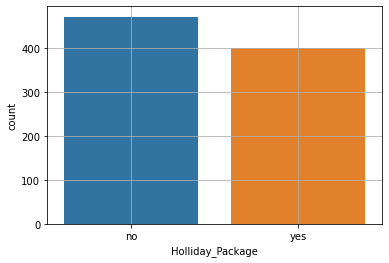

In [91]:
sns.countplot(holi_df.Holliday_Package)

plt.grid()

plt.show()

employees who opted for Holiday Package:401(45.9%)

employees who not opted for Holiday Package:471(54%)

Text(0.5, 1.0, 'no_older_children vs Holliday_Package')

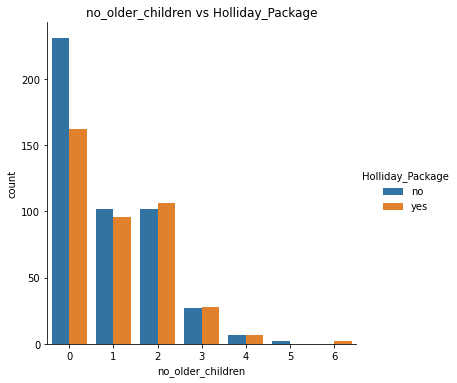

In [92]:
sns.catplot(x="no_older_children", kind="count",hue='Holliday_Package', data=holi_df)
plt.title("no_older_children vs Holliday_Package")

some Employees with no kids opted for Holiday_package but most of employees with no kids not opted the Holiday package

Text(0.5, 1.0, 'no_young_children vs Holliday_Package')

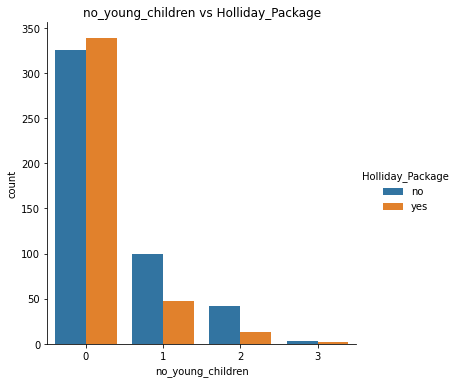

In [93]:
sns.catplot(x="no_young_children", kind="count",hue='Holliday_Package', data=holi_df)
plt.title("no_young_children vs Holliday_Package")

Text(0.5, 1.0, 'foreign & Salary')

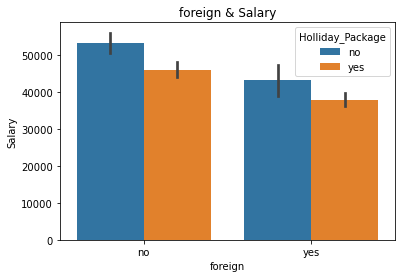

In [94]:
ax = sns.barplot(x='foreign', y='Salary', hue='Holliday_Package',data=holi_df)
plt.title("foreign & Salary")

some foreign employers paid less salary than the other employees

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'foreign vs Holliday_Package')

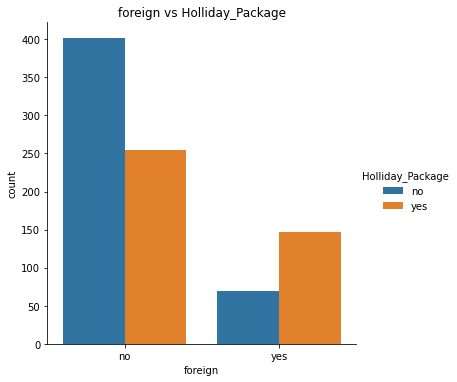

In [95]:
ax = sns.catplot(x='foreign', kind='count',data=holi_df,hue='Holliday_Package',ax=ax)
plt.title("foreign vs Holliday_Package")

most of foreign employees are not opted for holiday package

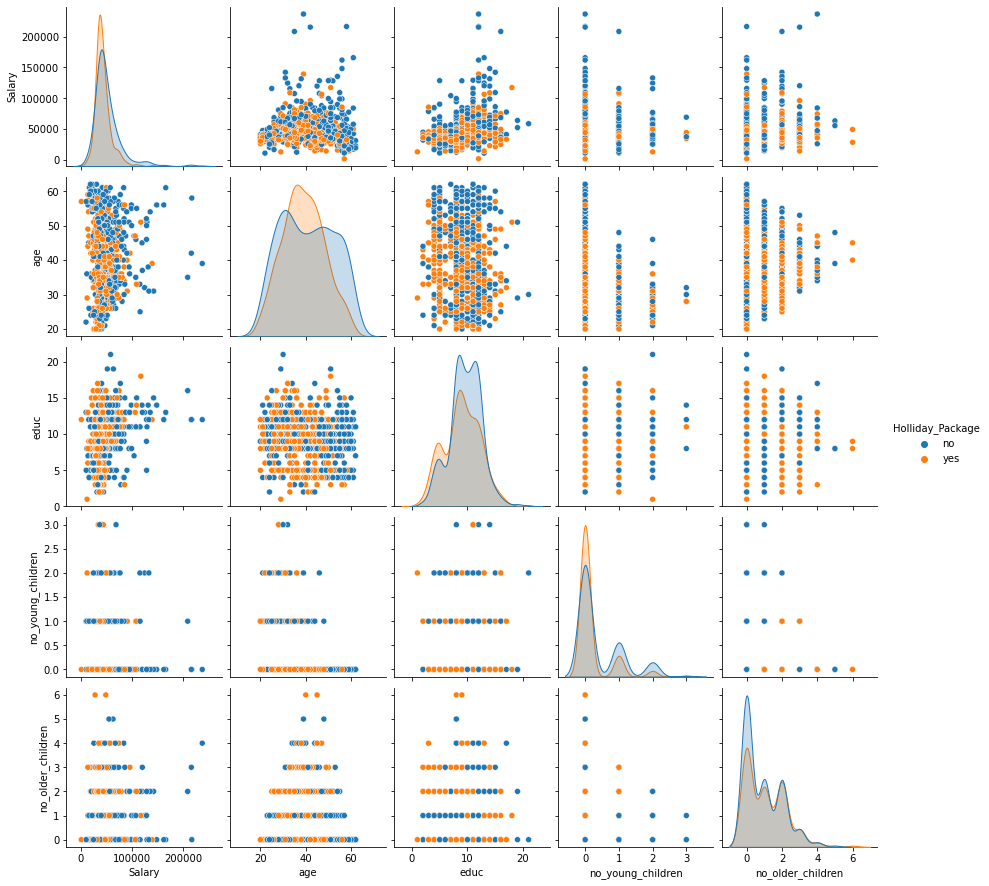

In [96]:
sns.pairplot(holi_df , hue='Holliday_Package' , diag_kind = 'kde')

Some of the attributes look like they may have an exponential distribution
 
Salary should probably have a normal distribution, the constraints on the data collection may have skewed the distribution.

age and salary are correlated with each each other

educ and salary are correlated with each each other

There is no obvious relationship between no younger children and holiday package

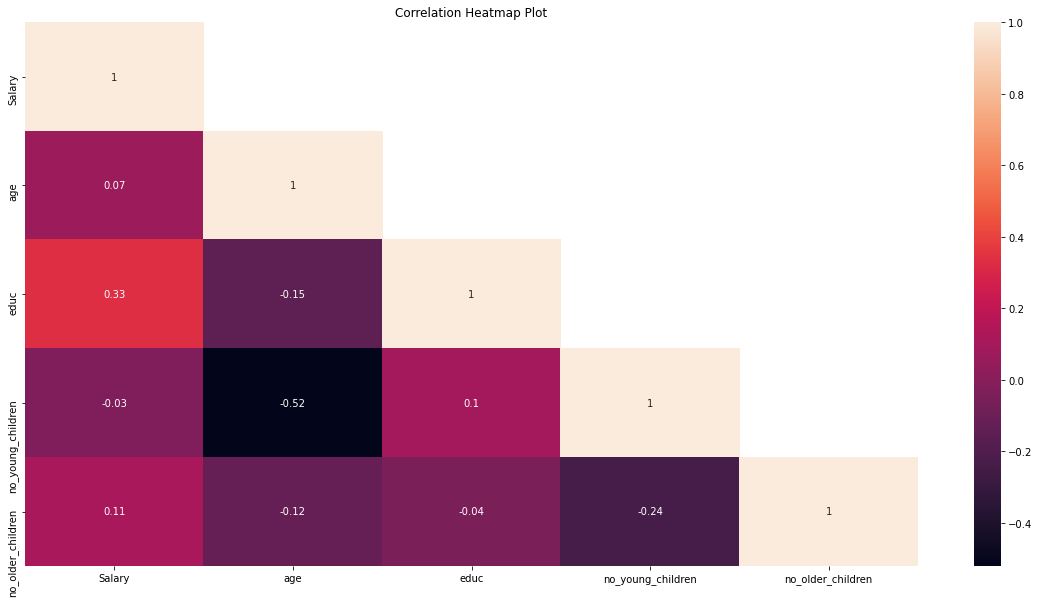

In [97]:
plt.figure(figsize=(20,10))
sns.heatmap(round(holi_df.corr(),2), annot=True,mask=np.triu(holi_df.corr(),+1));
plt.title('Correlation Heatmap Plot')
plt.show()

positive correlation between educ and salary

moderate negative correlation seen between age and no_young_children

In [98]:
holi_df.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

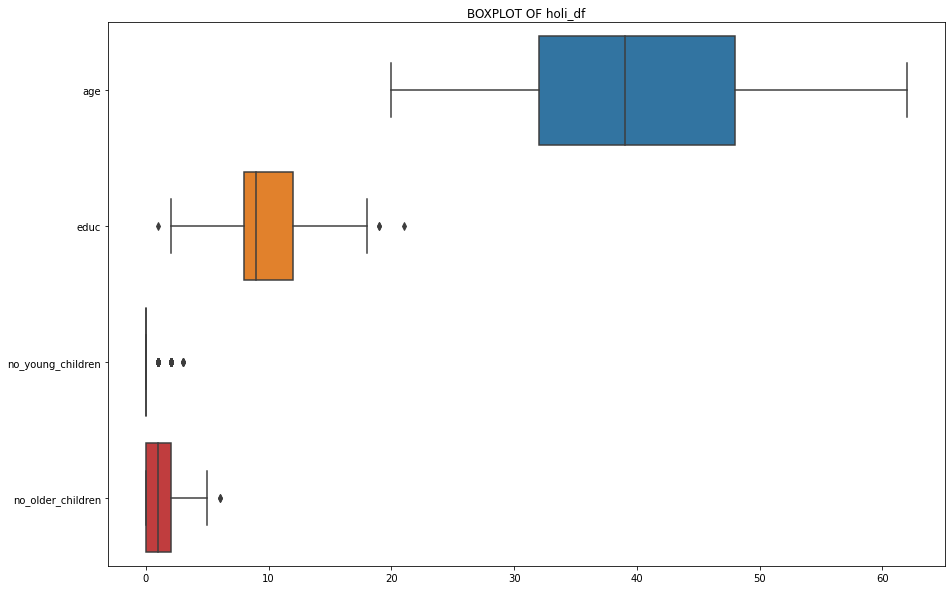

In [99]:
plt.subplots(figsize=(15,10))
plt.title('BOXPLOT OF holi_df')
sns.boxplot(data=holi_df[['Holliday_Package', 'age', 'educ', 'no_young_children','no_older_children', 'foreign']],orient="h")
plt.show()

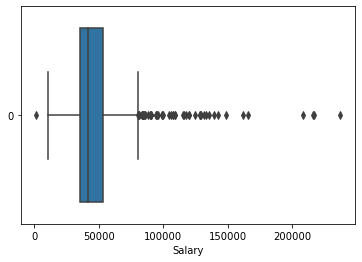

In [100]:
sns.boxplot(data = holi_df[("Salary")],orient = "h")
plt.xlabel("Salary")
plt.show()

In [101]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [102]:
dtypes=holi_df.dtypes[(holi_df.dtypes!= 'object')].index
for column in holi_df[dtypes].columns:
    lr,ur=remove_outlier(holi_df[column])
    holi_df[column]=np.where(holi_df[column]>ur,ur,holi_df[column])
    holi_df[column]=np.where(holi_df[column]<lr,lr,holi_df[column])

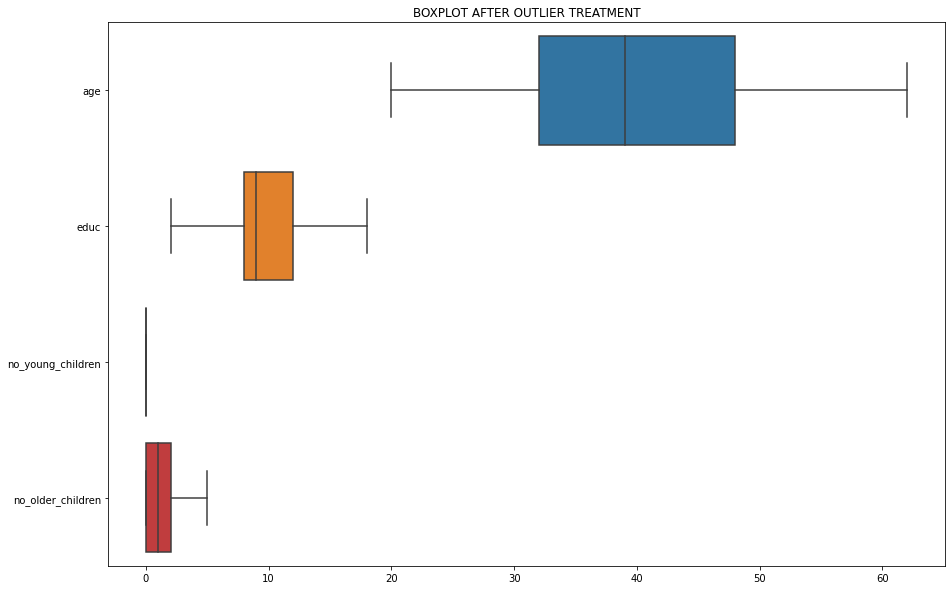

In [103]:
plt.subplots(figsize=(15,10))
plt.title('BOXPLOT AFTER OUTLIER TREATMENT')
sns.boxplot(data=holi_df[['Holliday_Package', 'age', 'educ', 'no_young_children','no_older_children', 'foreign']],orient="h")
plt.show()

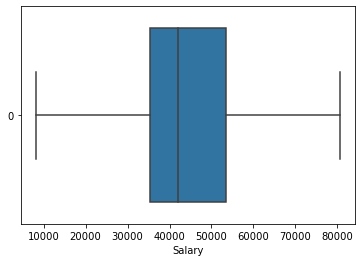

In [104]:
sns.boxplot(data = holi_df[("Salary")],orient = "h")
plt.xlabel("Salary")
plt.show()

# 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [ ]:
# for feature in holi_df.columns: 
    if holi_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(holi_df[feature].unique()))
        print(pd.Categorical(holi_df[feature].unique()).codes)
        holi_df[feature] = pd.Categorical(holi_df[feature]).codes

In [106]:
holi_df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30.0,8.0,0.0,1.0,0
1,1,37207.0,45.0,8.0,0.0,1.0,0
2,0,58022.0,46.0,9.0,0.0,0.0,0
3,0,66503.0,31.0,11.0,0.0,0.0,0
4,0,66734.0,44.0,12.0,0.0,2.0,0


# Train-Test Split

In [108]:
X = holi_df.drop("Holliday_Package",axis = 1)
y = holi_df[["Holliday_Package"]]

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [110]:
print('The training set for the independent variables:',X_train.shape)
print('The training set for the dependent variable:',y_train.shape)
print('The test set for the independent variables:',X_test.shape)
print('The test set for the dependent variable:',y_test.shape)

The training set for the independent variables: (610, 6)
The training set for the dependent variable: (610, 1)
The test set for the independent variables: (262, 6)
The test set for the dependent variable: (262, 1)


# Logistic Regression Model

In [111]:
# Fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Arun Sivaji\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

# Predicting on Training and Test dataset

In [112]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

# Getting the Predicted Classes and Probs

In [113]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.586738,0.413262
1,0.542853,0.457147
2,0.547597,0.452403
3,0.593680,0.406320
4,0.533035,0.466965


# Model Evaluation

In [114]:
model.score(X_train, y_train)

0.5344262295081967

In [115]:
model.score(X_test, y_test)

0.5534351145038168

# Applying GridSearchCV for Logistic Regression

In [116]:
grid={'penalty':['l2','none'],
      'solver':['newton-cg',  'saga'],
      'max_iter':[10000,100000],
      'tol':[0.0001,0.001]
     }

In [117]:
model1 = LogisticRegression(max_iter=10000,n_jobs=2)

In [119]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [120]:
grid_search = GridSearchCV(estimator = model1, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [121]:
grid_search.fit(X_train, y_train)

C:\Users\Arun Sivaji\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'max_iter': [10000, 100000], 'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'saga'],
                         'tol': [0.0001, 0.001]},
             scoring='f1')

In [122]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'max_iter': 10000, 'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg')


In [123]:
best_model = grid_search.best_estimator_

# Prediction on the training set

In [124]:
ytrain_predict1 = best_model.predict(X_train)
ytest_predict1 = best_model.predict(X_test)

# The probabilities on the test set

In [125]:
ytrain_predict_prob1=best_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob1).head()

,0,1
0,0.703245,0.296755
1,0.292507,0.707493
2,0.736855,0.263145
3,0.674156,0.325844
4,0.506643,0.493357


In [126]:
ytest_predict_prob1=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob1).head()

,0,1
0,0.696807,0.303193
1,0.332213,0.667787
2,0.620128,0.379872
3,0.686886,0.313114
4,0.354964,0.645036


In [179]:
accuracy_lr_train= best_model.score(X_train, y_train)
accuracy_lr_train

0.6409836065573771

In [182]:
accuracy_lr_test= best_model.score(X_test, y_test)
accuracy_lr_test

0.6297709923664122

Using GridsearchCV, we input various parameters like 'max_iter', 'penalty',solver', 'tol' which will helps us to find best grid for prediction of the better model

max_iter is an integer (100 by default) that defines the maximum number of iterations by the solver during model fitting.

solver is a string ('liblinear' by default) that decides what solver to use for fitting the model. Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.

penalty is a string ('l2' by default) that decides whether there is regularization and which approach to use. Other options are 'l1', 'elasticnet', and 'none'.

bestgrid:{'max_iter': 10000, 'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.0001}

Accuracy score of training data:64%

Accuracy score of training data:62.9%

In [128]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head(10)

,Salary,age,educ,no_young_children,no_older_children,foreign,Holliday_Package
502,34017.00,57.0,5.0,0.0,0.0,0,0
729,32197.00,22.0,6.0,0.0,0.0,1,1
604,80687.75,31.0,12.0,0.0,0.0,0,0
246,72394.00,50.0,14.0,0.0,1.0,0,0
494,28596.00,49.0,15.0,0.0,0.0,0,1
760,27789.00,44.0,4.0,0.0,0.0,1,1
40,66588.00,41.0,12.0,0.0,2.0,0,1
89,75798.00,49.0,12.0,0.0,2.0,0,1
448,80687.75,56.0,12.0,0.0,0.0,0,0
355,41382.00,31.0,11.0,0.0,1.0,0,0


In [129]:
import statsmodels.formula.api as smf

In [130]:
lm1 = smf.logit(formula= 'Holliday_Package~Salary+age+educ+no_older_children+foreign', data = data_train).fit()
lm1.params

Optimization terminated successfully.
         Current function value: 0.641276
         Iterations 5


Intercept           -0.052700
Salary              -0.000019
age                 -0.008975
educ                 0.066395
no_older_children    0.186668
foreign              1.331779
dtype: float64

In [131]:
print(lm1.summary())

                           Logit Regression Results                           
Dep. Variable:       Holliday_Package   No. Observations:                  610
Model:                          Logit   Df Residuals:                      604
Method:                           MLE   Df Model:                            5
Date:                Sun, 27 Mar 2022   Pseudo R-squ.:                 0.07166
Time:                        11:26:00   Log-Likelihood:                -391.18
converged:                       True   LL-Null:                       -421.37
Covariance Type:            nonrobust   LLR p-value:                 1.010e-11
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0527      0.578     -0.091      0.927      -1.185       1.080
Salary            -1.853e-05   6.22e-06     -2.982      0.003   -3.07e-05   -6.35e-06
age                  -0.

The summary table :

The summary table below, gives us a descriptive summary about the regression results.

foreign have coeffient of 1.3318 which shows foreign is important independent variable feature

This means that for a one-unit increase in foreign we expect a 1.3318 increase in the log-odds of the dependent variable holiday_package, holding all other independent variables constant.

Std. Err. – These are the standard errors associated with the coefficients.age have very low std.err

foreign and salary having p-value <0.05 .they are statistically significant.

# Linear Discriminant Analysis(LDA) algorithm

In [132]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# Build LDA Model
clf = LinearDiscriminantAnalysis()
Lda_model=clf.fit(X_train,y_train)

In [134]:
pred_class_train = Lda_model.predict(X_train)


In [135]:
pred_class_test = Lda_model.predict(X_test)

# Probability prediction for the training and test data

In [136]:
pred_prob_train = model.predict_proba(X_train)

In [137]:
pred_prob_test = model.predict_proba(X_test)

In [138]:
accuracy_lda_train= Lda_model.score(X_train, y_train)
accuracy_lda_train

0.6426229508196721

In [139]:
accuracy_lda_test= Lda_model.score(X_test, y_test)
accuracy_lda_test

0.6297709923664122

# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [140]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [168]:
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

# Confusion matrix on the training and test data

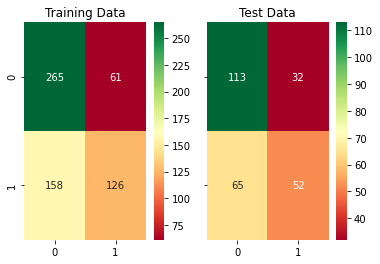

In [169]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict1)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict1)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][1]);
a[0][1].set_title('Test Data');

Logistic regression Insights:-

Confusion matrix on the training and test data

Trainig data:

True Negative : 265 False Positive : 61

False Negative : 158 True Positive : 126

Test data:

True Negative : 113 False Positive : 32

False Negative : 65 True Positive : 52

# Classification Report of training and test data

In [143]:
print(classification_report(y_train, ytrain_predict1),'\n');
print(classification_report(y_test, ytest_predict1),'\n');

              precision    recall  f1-score   support

           0       0.63      0.81      0.71       326
           1       0.67      0.44      0.54       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610
 

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262
 



In [144]:
train_auc_lr = metrics.roc_auc_score(y_train,ytrain_predict_prob1[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lr)

AUC for the Training Data: 0.667


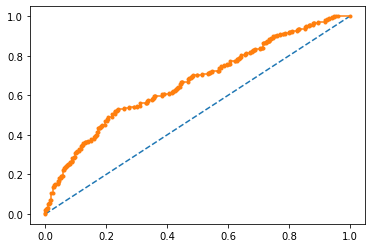

In [145]:
fpr, tpr, thresholds = metrics.roc_curve(y_train,ytrain_predict_prob1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

In [146]:
test_auc_lr = metrics.roc_auc_score(y_test,ytest_predict_prob1[:,1])
print('AUC for the Test Data: %.3f' %test_auc_lr )

AUC for the Test Data: 0.661


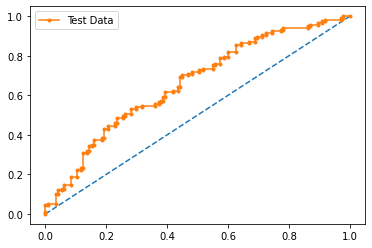

In [147]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,ytest_predict_prob1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Test Data')
plt.legend(loc='best')
plt.show()

In [ ]:
Logistic regression
Train Data:
### AUC: 66.7%
### Accuracy: 64%
### precision : 67%
#recall : 44%
#f1  :54%

Test Data:
### AUC: 66.1%
### Accuracy: 63%
### precision  63
#recall : 44%
#f1 : 52%

#### Training and Test set results are almost similar,This proves no overfitting or underfitting
#### The Precision and Recall metrics also almost similiar between training and test set.

In [148]:
best_model.coef_

array([[-1.85343057e-05, -8.97525267e-03,  6.63946549e-02,
         0.00000000e+00,  1.86667727e-01,  1.33177546e+00]])

In [149]:
print("The intercept for the model is :",best_model.intercept_)

The intercept for the model is : [-0.05269997]


In [150]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, best_model.coef_[0][idx]))

The coefficient for Salary is -1.8534305725437244e-05
The coefficient for age is -0.008975252670392637
The coefficient for educ is 0.06639465493762979
The coefficient for no_young_children is 0.0
The coefficient for no_older_children is 0.18666772735970738
The coefficient for foreign is 1.331775458382739


The coefficients for each of the independent attributes

The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

The coefficient for foreign is 1.33 which shows "foreign" variable is high positive correlation with "holiday_package" (dependent variables)

If more foreign employees opted for holiday package ,no of employees opted for holiday_package will increase

There is more negative correlation between "holiday package " and salary,age variables 

Feature: 0, Score: -0.00002
Feature: 1, Score: -0.00898
Feature: 2, Score: 0.06639
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.18667
Feature: 5, Score: 1.33178


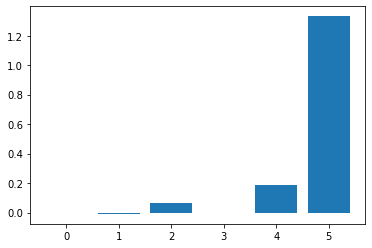

In [151]:
importance = best_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()
#1.57584

In [152]:
feature_importances = (importance / sum(importance))*100

feature_importances

array([-1.17615101e-03, -5.69552085e-01,  4.21327572e+00,  0.00000000e+00,
        1.18455711e+01,  8.45118814e+01])

In [153]:
#1. foreign (+ve) – 84 % increase per unit

#2. educ (+ve) – 4.2 % increase per unit
#3. age (-ve) – .569 % decrease per unit
#5. no_older_children (+ve) -11.84 % decrease per unit

In [154]:
vif1 = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [155]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif1[i])
        i = i+1

Salary ---> 10.691328770445464
age ---> 7.883717090792149
educ ---> 9.289879244969368
no_young_children ---> nan
no_older_children ---> 1.8287587912872862
foreign ---> 1.3123489821120458


In [ ]:
#foreign and no older children are important variable

In [156]:
metrics=classification_report(y_train, ytrain_predict1,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_lr=round(df.loc["1"][0],2)
train_recall_lr=round(df.loc["1"][1],2)
train_f1_lr=round(df.loc["1"][2],2)
print ('LR_train_precision ',train_precision_lr)
print ('LR_train_recall ',train_recall_lr)
print ('LR_train_f1 ',train_f1_lr)

LR_train_precision  0.67
LR_train_recall  0.44
LR_train_f1  0.54


In [157]:
metrics=classification_report(y_test, ytest_predict1,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_lr=round(df.loc["1"][0],2)
test_recall_lr=round(df.loc["1"][1],2)
test_f1_lr=round(df.loc["1"][2],2)
print ('LR_test_precision ',test_precision_lr)
print ('LR_test_recall ',test_recall_lr)
print ('LR_test_f1 ',test_f1_lr)

LR_test_precision  0.62
LR_test_recall  0.44
LR_test_f1  0.52


# LDA

In [158]:
print("The intercept of the model is ",Lda_model.intercept_)

The intercept of the model is  [-0.07340127]


In [159]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, Lda_model.coef_[0][idx]))

The coefficient for Salary is -1.8319623552909e-05
The coefficient for age is -0.009003817204418353
The coefficient for educ is 0.06513802792962098
The coefficient for no_young_children is -3.784736982288265e-16
The coefficient for no_older_children is 0.18747103956268826
The coefficient for foreign is 1.3765145540963217


In [160]:
importance = Lda_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.00002
Feature: 1, Score: -0.00900
Feature: 2, Score: 0.06514
Feature: 3, Score: -0.00000
Feature: 4, Score: 0.18747
Feature: 5, Score: 1.37651


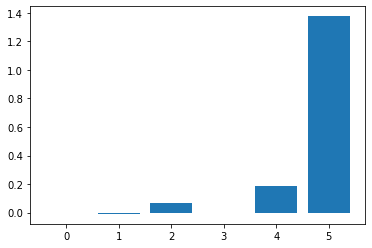

In [161]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [162]:
#1. foreign (+ve) – 84 % increase per unit

#2. educ (+ve) – 4.02 % increase per unit
#3. age (-ve) – .55 % decrease per unit
#5. no_older_children (+ve) -11.57 % decrease per unit

In [163]:
metrics=classification_report(y_train,pred_class_train,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_lda=round(df.loc["1"][0],2)
train_recall_lda=round(df.loc["1"][1],2)
train_f1_lda=round(df.loc["1"][2],2)
print ('LDA_train_precision ',train_precision_lr)
print ('LDA_train_recall ',train_recall_lr)
print ('LDA_train_f1 ',train_f1_lr)


LDA_train_precision  0.67
LDA_train_recall  0.44
LDA_train_f1  0.54


In [164]:
metrics=classification_report(y_test,pred_class_test,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_lda=round(df.loc["1"][0],2)
test_recall_lda=round(df.loc["1"][1],2)
test_f1_lda=round(df.loc["1"][2],2)
print ('LDA_test_precision ',test_precision_lr)
print ('LDA_test_recall ',test_recall_lr)
print ('LDA_test_f1 ',test_f1_lr)

LDA_test_precision  0.62
LDA_test_recall  0.44
LDA_test_f1  0.52


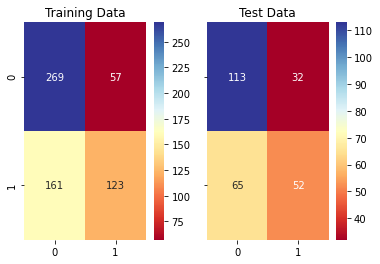

In [170]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][1]);
a[0][1].set_title('Test Data');

 
LDA Inference:
Confusion matrix on the training and test data

Trainig data:

True Negative : 269 False Positive : 57

False Negative : 161 True Positive : 123

Test data:

True Negative : 113 False Positive : 32

False Negative : 65 True Positive : 52

In [173]:
print(classification_report(y_train, pred_class_train),'\n');
print(classification_report(y_test, pred_class_test),'\n');

              precision    recall  f1-score   support

           0       0.63      0.83      0.71       326
           1       0.68      0.43      0.53       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610
 

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262
 



In [174]:
train_auc_lda  = metrics.roc_auc_score(y_train, pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lda)


AUC for the Training Data: 0.591


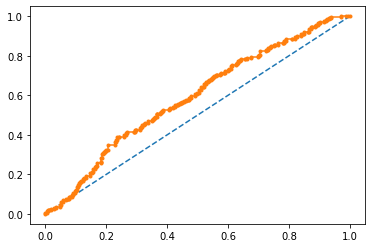

In [175]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

In [176]:
test_auc_lda = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % test_auc_lda)

AUC for the Test Data: 0.633


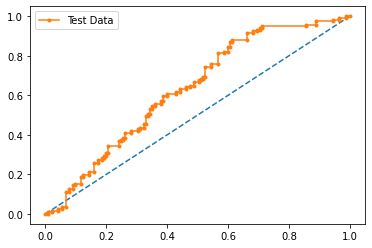

In [177]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

Logistic regression

Train Data:
AUC: 59.1%
Accuracy: 64%
precision : 68%
recall : 43%
f1  :53%

Test Data:
AUC: 63.3%
Accuracy: 63%
precision  63
recall : 44%
f1 : 52%

Training and Test set results are almost similar,This proves no overfitting or underfitting
The Precision and Recall metrics also almost similiar between training and test set.

In [184]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[accuracy_lr_train,train_auc_lr,train_recall_lr,train_precision_lr,train_f1_lr],
        'LR Test':[accuracy_lr_test,test_auc_lr,test_recall_lr,test_precision_lr,test_f1_lr],
        'LDA Train':[accuracy_lda_train,train_auc_lda,train_recall_lda,train_precision_lda,train_f1_lda],
        'LDA Test':[accuracy_lda_test,test_auc_lda,test_recall_lda,test_precision_lda,test_f1_lda]},index=index)  
round(data,3)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.641,0.630,0.643,0.630
AUC,0.667,0.661,0.591,0.633
Recall,0.440,0.440,0.430,0.440
Precision,0.670,0.620,0.680,0.620
F1 Score,0.540,0.520,0.530,0.520


In [185]:
models_names={best_model:'Logistic Regression',Lda_model:'LDA'}

Area under the curve for Logistic Regression Model is 0.666864685042772
Area under the curve for LDA is 0.590976842650998


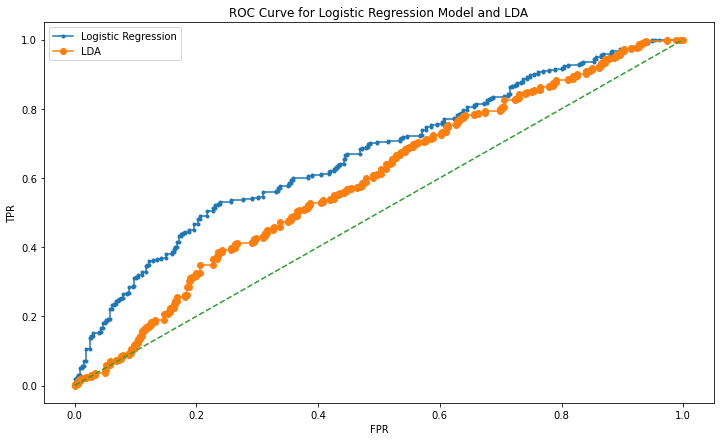

In [186]:
print('Area under the curve for Logistic Regression Model is',roc_auc_score(y_train,ytrain_predict_prob1[:,1]))
print('Area under the curve for LDA is',roc_auc_score(y_train, pred_prob_train[:,1]))

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_train,ytrain_predict_prob1[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(y_train, pred_prob_train[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o') 

fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')


plt.title('ROC Curve for {}'.format('Logistic Regression Model and LDA'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()


Area under the curve for Logistic Regression Model is 0.6610079575596816
Area under the curve for LDA is 0.6329501915708813


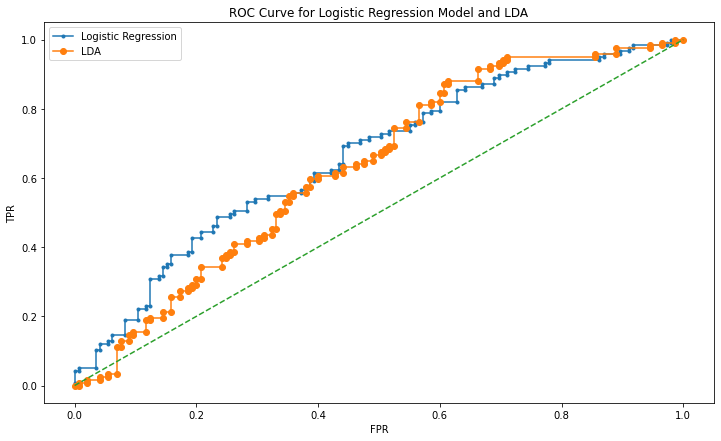

In [187]:
print('Area under the curve for Logistic Regression Model is',roc_auc_score(y_test,ytest_predict_prob1[:,1]))
print('Area under the curve for LDA is',roc_auc_score(y_test, pred_prob_test[:,1]))

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test,ytest_predict_prob1[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, pred_prob_test[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o') 

fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('Logistic Regression Model and LDA'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

# 2.4 Inference: Basis on these predictions, what are the insights and recommendations.Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

As interpretation, 

1) There is no plausible effect of salary, age, and education on the prediction for 
Holliday_packages. These variables don’t seem to impact the decision to opt for 
holiday packages as we couldn’t establish a strong relation of these variables with 
the target variable

2) Foreign has emerged as a strong predictor with a positive coefficient value. The log 
likelihood or likelihood of a foreigner opting for a holiday package is high.

3) no_young_children variable is negating the probability for opting for holiday 
packages, especially for couple with number of young children at 2. 

Recommendation: 

1) The company should really focus on foreigners to drive the sales of their holiday 
packages as that’s where the majority of conversions are going to come in. 

2) The company can try to direct their marketing efforts or offers toward foreigners for a 
better conversion opting for holiday packages 

3) The company should also stay away from targeting parents with younger children. 
The chances of selling to parents with 2 younger children is probably the lowest. This 
also gels with the fact that parents try and avoid visiting with younger children.

4) If the firm wants to target parents with older children, that still might end up giving 
favorable return for their marketing efforts then spent on couples with younger 
children.